In [ ]:
import os
import shutil
import glob
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
# # THIS CODE NEEDED TO BE RUN ONLY ONCE FOR COPYING FILES INTO ONE PLACE
# train_dir = sorted(glob.glob(f'drive/MyDrive/Colab Notebooks/dataset/train/TrainSeq*/image/*.png'))
# labels_dir = sorted(glob.glob(f'drive/MyDrive/Colab Notebooks/dataset/train/TrainSeq*/label/*.png'))

# target_dir_train = f'drive/MyDrive/Colab Notebooks/dataset/train/trainA'
# target_dir_label = f'drive/MyDrive/Colab Notebooks/dataset/train/labelA'

# for file in train_dir:
#   shutil.move(file, target_dir_train)
# for file in labels_dir:
  # shutil.move(file, target_dir_label)

In [ ]:
# # THIS CODE NEEDED TO BE RUN ONLY ONCE FOR LABEL PRE-PROCESSING
# labels_dir = sorted(glob.glob(f'drive/MyDrive/Colab Notebooks/dataset/train/labelA/*.png'))
# labels = [cv2.imread(file) for file in labels_dir]

# gray_labels = [cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) for img in labels]
# lane_labels = [cv2.inRange(img, 225, 227) for img in gray_labels]

# seq = 0 
# no = 0
# for img in lane_labels:
#   path = os.path.join('drive','MyDrive','Colab Notebooks', 'dataset','train','labelB','TrainSeq%02d_ColorLabel_%04d.png'% (seq, no))
#   cv2.imwrite(path, img)
#   no += 1
#   if no == 60:
#     no = 0
#     seq += 1

In [ ]:
# from PIL import Image
# import pickle
# import matplotlib.pyplot as plt

# train_images_files = sorted(glob.glob(f'drive/MyDrive/Colab Notebooks/dataset/train/trainA/*.png'))
# label_images_files = sorted(glob.glob(f'drive/MyDrive/Colab Notebooks/dataset/train/labelA/*.png'))

# train_images = [Image.open(file) for file in train_images_files]
# label_images = [Image.open(file) for file in label_images_files]

# new_size = (160, 80)
# train_images_r = [img.resize(new_size) for img in train_images]
# label_images_r = [img.resize(new_size) for img in label_images]                            

# train = [np.asarray(img) for img in train_images_r]
# label = [np.asarray(img) for img in label_images_r]

# pickle.dump(train,open(f'drive/MyDrive/Colab Notebooks/dataset/train.p', 'wb'))
# pickle.dump(label,open(f'drive/MyDrive/Colab Notebooks/dataset/label.p', 'wb'))

In [ ]:
import pickle
train = pickle.load(open(f'drive/MyDrive/Colab Notebooks/dataset/full_CNN_train.p', 'rb'))
label = pickle.load(open(f'drive/MyDrive/Colab Notebooks/dataset/full_CNN_labels.p', 'rb'))

In [ ]:
print(train[0].shape)

(80, 160, 3)


In [ ]:
train = np.array(train)
label = np.array(label)
label = label / 255

In [ ]:
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split

train, label = shuffle(train, label)
X_train, X_validation, y_train, y_validation = train_test_split(train, label, test_size=0.2)

In [ ]:
BATCH_SIZE = 128
EPOCHS = 10
POOL_SIZE = (2, 2)
INPUT_SHAPE = X_train.shape[1:]
print('input_shape: ' + str(INPUT_SHAPE))
print('X_train: ' + str(len(X_train)))
print('X_val: ' + str(len(X_validation)))

input_shape: (80, 160, 3)
X_train: 10211
X_val: 2553


In [ ]:
import tensorflow as tf
from keras.layers import BatchNormalization
from keras.layers import Conv2D, Conv2DTranspose, MaxPooling2D
from keras.layers import Activation, Dropout, UpSampling2D
from keras import regularizers


model = tf.keras.models.Sequential()
# Normalizes incoming inputs. First layer needs the input shape to work
model.add(BatchNormalization(input_shape=INPUT_SHAPE))

# Below layers were re-named for easier reading of model summary; this not necessary
# Conv Layer 1
model.add(Conv2D(8, (3, 3), padding='valid', strides=(1,1), activation = 'relu', name = 'Conv1'))

# Conv Layer 2
model.add(Conv2D(16, (3, 3), padding='valid', strides=(1,1), activation = 'relu', name = 'Conv2'))

# Pooling 1
model.add(MaxPooling2D(pool_size=POOL_SIZE))

# Conv Layer 3
model.add(Conv2D(16, (3, 3), padding='valid', strides=(1,1), activation = 'relu', name = 'Conv3'))
model.add(Dropout(0.2))

# Conv Layer 4
model.add(Conv2D(32, (3, 3), padding='valid', strides=(1,1), activation = 'relu', name = 'Conv4'))
model.add(Dropout(0.2))

# Conv Layer 5
model.add(Conv2D(32, (3, 3), padding='valid', strides=(1,1), activation = 'relu', name = 'Conv5'))
model.add(Dropout(0.2))

# Pooling 2
model.add(MaxPooling2D(pool_size=POOL_SIZE))

# Conv Layer 6
model.add(Conv2D(64, (3, 3), padding='valid', strides=(1,1), activation = 'relu', name = 'Conv6'))
model.add(Dropout(0.2))

# Conv Layer 7
model.add(Conv2D(64, (3, 3), padding='valid', strides=(1,1), activation = 'relu', name = 'Conv7'))
model.add(Dropout(0.2))

# Pooling 3
model.add(MaxPooling2D(pool_size=POOL_SIZE))

# Upsample 1
model.add(UpSampling2D(size=POOL_SIZE))

# Deconv 1
model.add(Conv2DTranspose(64, (3, 3), padding='valid', strides=(1,1), activation = 'relu', name = 'Deconv1'))
model.add(Dropout(0.2))

# Deconv 2
model.add(Conv2DTranspose(64, (3, 3), padding='valid', strides=(1,1), activation = 'relu', name = 'Deconv2'))
model.add(Dropout(0.2))

# Upsample 2
model.add(UpSampling2D(size=POOL_SIZE))

# Deconv 3
model.add(Conv2DTranspose(32, (3, 3), padding='valid', strides=(1,1), activation = 'relu', name = 'Deconv3'))
model.add(Dropout(0.2))

# Deconv 4
model.add(Conv2DTranspose(32, (3, 3), padding='valid', strides=(1,1), activation = 'relu', name = 'Deconv4'))
model.add(Dropout(0.2))

# Deconv 5
model.add(Conv2DTranspose(16, (3, 3), padding='valid', strides=(1,1), activation = 'relu', name = 'Deconv5'))
model.add(Dropout(0.2))

# Upsample 3
model.add(UpSampling2D(size=POOL_SIZE))

# Deconv 6
model.add(Conv2DTranspose(16, (3, 3), padding='valid', strides=(1,1), activation = 'relu', name = 'Deconv6'))

# Final layer - only including one channel so 1 filter
model.add(Conv2DTranspose(1, (3, 3), padding='valid', strides=(1,1), activation = 'relu', name = 'Final'))



In [ ]:
datagen = tf.keras.preprocessing.image.ImageDataGenerator(channel_shift_range=0.2,
                                                          width_shift_range=.15,
                                                          horizontal_flip=True,
                                                          zoom_range=0.2,
                                                          rotation_range=20)
datagen.fit(X_train)

In [ ]:
model.compile(optimizer='Adam', loss='mean_squared_error', metrics=['accuracy'])


In [ ]:
history = model.fit_generator(datagen.flow(X_train, y_train, batch_size=BATCH_SIZE),
                    steps_per_epoch=len(X_train)/BATCH_SIZE,
                    epochs=EPOCHS,
                    verbose=1,
                    validation_data=(X_validation, y_validation))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  """


Epoch 1/10
79/79 [==============================] - 68s 671ms/step - loss: 0.0711 - accuracy: 0.8791 - val_loss: 0.0521 - val_accuracy: 0.9075
Epoch 2/10
79/79 [==============================] - 50s 624ms/step - loss: 0.0476 - accuracy: 0.9071 - val_loss: 0.0444 - val_accuracy: 0.9201
Epoch 3/10
79/79 [==============================] - 51s 634ms/step - loss: 0.0452 - accuracy: 0.9102 - val_loss: 0.0418 - val_accuracy: 0.9229
Epoch 4/10
79/79 [==============================] - 51s 633ms/step - loss: 0.0443 - accuracy: 0.9112 - val_loss: 0.0392 - val_accuracy: 0.9273
Epoch 5/10
79/79 [==============================] - 50s 621ms/step - loss: 0.0435 - accuracy: 0.9121 - val_loss: 0.0356 - val_accuracy: 0.9313
Epoch 6/10
79/79 [==============================] - 52s 645ms/step - loss: 0.0433 - accuracy: 0.9123 - val_loss: 0.0368 - val_accuracy: 0.9303
Epoch 7/10
79/79 [==============================] - 51s 640ms/step - loss: 0.0429 - accuracy: 0.9128 - val_loss: 0.0339 - val_accuracy: 0.9336

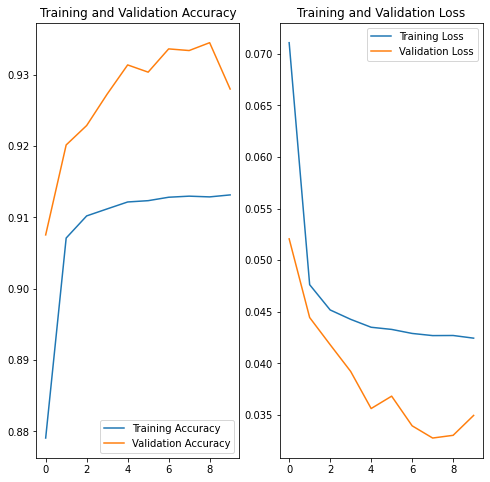

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(EPOCHS)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
## CNN